In [791]:
#Importing required libraries
import pandas as pd
import numpy as np

In [792]:
#Loading the dataset
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

## Exploratory Data Analysis

In [793]:
df.shape

(1000, 2)

In [794]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [795]:
df.dtypes

Review    object
Liked      int64
dtype: object

In [796]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [797]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [798]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [799]:
df.describe(include='object')

,Review
count,1000
unique,996
top,I would not recommend this place.
freq,2


## Data Cleaning

### Checking for Nan values in the dataset

In [800]:
df.isnull().values.any()

False

In [801]:
df.isnull().sum().sum()

0

#### Note: There are no NaN values in tha dataset.

### Checking for duplicates in the dataset

In [802]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [803]:
df.duplicated().sum()

4

In [804]:
df.Review.duplicated().sum()

4

In [805]:
df.drop_duplicates(inplace=True)

In [806]:
df.duplicated().sum()

0

In [807]:
df.shape

(996, 2)

In [808]:
len(df)

996

In [809]:
df = df.reset_index()

In [810]:
df = df.drop(['index'], axis=1)

#### Note: Removed duplicates from the dataset

## Data Visualization

In [811]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

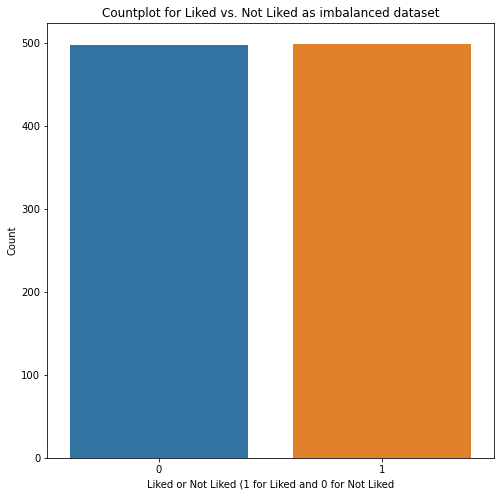

In [812]:
# Countplot for Liked vs. Not Liked as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='Liked', data=df)
p = plt.title('Countplot for Liked vs. Not Liked as imbalanced dataset')
p = plt.xlabel('Liked or Not Liked (1 for Liked and 0 for Not Liked')
p = plt.ylabel('Count')

In [813]:
df['Liked'].value_counts()[0]

497

In [814]:
df['Liked'].value_counts()[1]

499

#### From the above countplot, it is evident that the dataset is balanced (unbiased).

## Data Preprocessing

 - Removing special character and numbers using regular expression
 - Converting the entire 'Reviews' feature into lower case
 - Tokenizing the reviews by words
 - Removing the stop words
 - Lemmatizing the words
 - Joining the lemmatized words
 - Building a corpus of messages

In [815]:
# Importing essential libraries for performing Natural Language Processing on 'Restaurant_Reviews.tsv' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\basys\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [816]:
# Cleaning the restaurant reviews
corpus = []
for i in range(0,996):

  # Cleaning special characters from the reviews
  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=df['Review'][i])

  # Converting the entire review into lower case
  review = review.lower()

  # Tokenizing the review by words
  review_words = review.split()

  # Removing the stop words
  stop_words = set(stopwords.words('english'))
  negative_words = ['no', 'not', 'none', 'nothing', 'never', 'neither', 'nor']
  stop_words = stop_words - set(negative_words)
  review_words = [word for word in review_words if not word in stop_words]

  # Stemming the words
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]

  # Joining the stemmed words
  review = ' '.join(review)

  # Creating a corpus
  corpus.append(review)

In [817]:
corpus[0:10]

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

In [818]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500)
vectors = cv.fit_transform(corpus).toarray()
feature_names = cv.get_feature_names()

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df['Liked']

## Model Building

In [819]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [820]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [821]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [822]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

## Model Evaluation

In [823]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
score4 = cross_val_score(classifier, X, y, scoring='f1', cv=10)

print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))
print('Average F1-Score is: {} ---'.format(round(score4.mean(), 3)))

---- Scores ----
Accuracy score is: 80.5%
Precision score is: 0.86
Recall score is: 0.76
Average F1-Score is: 0.792 ---


In [824]:
# Classification report for MNB model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print('--- Classification report for MNB model ---')
print(classification_report(y_test, y_pred))

--- Classification report for MNB model ---
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        93
           1       0.86      0.76      0.81       107

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.81       200



In [825]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(69.0, 0.5, 'Actual values')

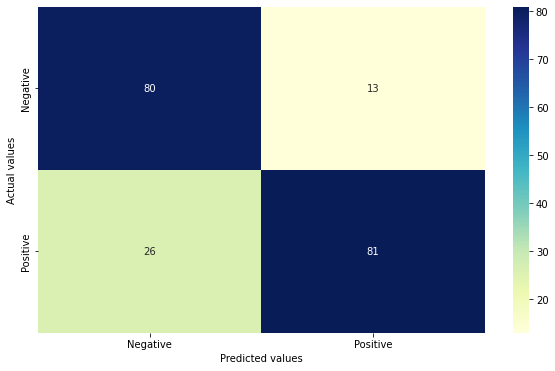

In [826]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

## Parameter Tuning

In [827]:
# Hyperparameter tuning the Multinomial Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 81.0%
Accuracy score for alpha=0.2 is: 80.5%
Accuracy score for alpha=0.3 is: 81.5%
Accuracy score for alpha=0.4 is: 81.5%
Accuracy score for alpha=0.5 is: 80.5%
Accuracy score for alpha=0.6 is: 80.5%
Accuracy score for alpha=0.7 is: 80.5%
Accuracy score for alpha=0.8 is: 80.5%
Accuracy score for alpha=0.9 is: 81.0%
Accuracy score for alpha=1.0 is: 80.5%
--------------------------------------------
The best accuracy is 81.5% with alpha value as 0.3


In [828]:
classifier = MultinomialNB(alpha=0.3)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.3)

In [829]:
y_pred = classifier.predict(X_test)

In [830]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
score4 = cross_val_score(classifier, X, y, scoring='f1', cv=10)

print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))
print('Average F1-Score is: {} ---'.format(round(score4.mean(), 3)))

---- Scores ----
Accuracy score is: 81.5%
Precision score is: 0.86
Recall score is: 0.79
Average F1-Score is: 0.792 ---


## Final Deployment (Predictions)

In [831]:
def predict_sentiment(input_review):
  input_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = input_review)
  input_review = input_review.lower()
  input_review_words = input_review.split()
  input_review_words = [word for word in input_review_words if not word in stop_words]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in input_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [832]:
# print("---------------------------------------------------")
# user_input=input("Enter the review of the restaurant:  ")
# final_prediction = predict_sentiment(user_input)

# print("---------------------------------------------------")
# if(final_prediction==0):
#     print("The review entered was negative.")    
#     print("The user did not like the restaurant.")
# if(final_prediction==1):
#     print("The review entered was positive.")
#     print("The user liked the restaurant.")

In [833]:
import pickle
filename = 'reviews_classifier.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [834]:
#Saving the corpus
with open('corpus.data', 'wb') as filehandle:     
    # store the data as binary data stream     
    pickle.dump(corpus, filehandle)